Atividade do Módulo 2 - Pós

In [58]:
#Import das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [59]:
#Import do dataset

df = pd.read_csv(r'C:\Users\DEINF.LEOBARROS\Desktop\Cursos\Pós\Kaggle\BreastCancer\breastcancer.csv')

In [60]:
#Separar o dataset em X (Features) e Y (Target), de acordo com as colunas necessárias
X = df.iloc[:,2:-1] # Todas as linhas, da coluna 2 até a penúltima
y = df.iloc[:,1] # Todas as linhas, Coluna 1

y = y.replace({'B':0, 'M':1}) # Traduz o target para um valor numérico

C:\Users\DEINF.LEOBARROS\AppData\Local\Temp\ipykernel_23176\981433933.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'B':0, 'M':1}) # Traduz o target para um valor numérico


Acurácia no conjunto de teste: 0.9298245614035088


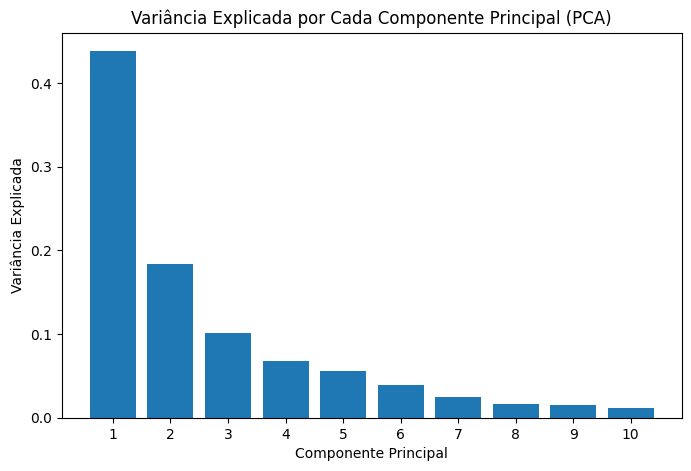

array([0.4383292 , 0.18413908, 0.10158532, 0.06803093, 0.05624249,
       0.03953245, 0.02437355, 0.01630403, 0.01462998, 0.01175767])

In [61]:
#Separar o os conjuntos de treino e teste
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=10)

clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Acurácia no conjunto de teste:", test_accuracy)

#Aplicação do Scaler para padronizar as features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#Aplicação do PCA
pca = PCA(n_components=10,random_state=10)
pca.fit(X_train_scaled)

plt.figure(figsize=(8,5))
plt.bar(range(1, 11), pca.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada por Cada Componente Principal (PCA)')
plt.xticks(range(1, 11))
plt.show()

pca.explained_variance_ratio_


In [62]:
#Utilizando as features que representam 70% dos dados
pca = PCA(n_components=3, random_state=10)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pca.explained_variance_ratio_


array([0.4383292 , 0.18413908, 0.10158532])

In [63]:
#Busca de hiperparâmetros com validação cruzada, será usado DecisionTreeClassifier
#Os hiperparâmetros que serão testados são: max_depth [3,None]; min_samples_split [2,10]
#Por serem poucos os hiperparâmetros a serem testados nesse caso, a busca utilizada será o GridSearch

#hiperparâmetros a serem testados
param_grid={
    'max_depth': [3, None],
    'min_samples_split': [2, 10]
}

estimator = DecisionTreeClassifier(random_state=10)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid , scoring='accuracy',cv=5)

grid.fit(X_train_pca, y_train)

print("Melhores hiperparâmetros encontrados:", grid.best_params_)

y_pred = grid.best_estimator_.predict(X_test_pca)

test_accuracy = accuracy_score(y_test, y_pred)

print("Acurácia no conjunto de teste:", test_accuracy)





Melhores hiperparâmetros encontrados: {'max_depth': 3, 'min_samples_split': 2}
Acurácia no conjunto de teste: 0.9473684210526315


In [64]:
#Método Ensemble

estimator = DecisionTreeClassifier(random_state=10,max_depth=3, min_samples_split=2)
ensemble = BaggingClassifier(estimator=estimator,n_estimators=100,random_state=10)

ensemble.fit(X_train_pca, y_train)
y_pred = ensemble.predict(X_test_pca)

test_accuracy = accuracy_score(y_test, y_pred)

print("Acurácia no conjunto de teste:", test_accuracy)

Acurácia no conjunto de teste: 0.9590643274853801
